<a href="https://colab.research.google.com/github/rurounigit/EasyOCR/blob/master/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os

In [14]:
image_folder = 'easyocr_samples'  # Replace with your folder path

In [2]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 21.2 MB/s eta 0:00:00


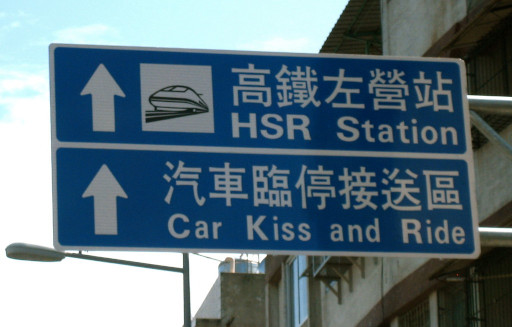

In [10]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("easyocr_samples/chinese_tra.jpg")
im

In [11]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['ch_sim','en'])

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image



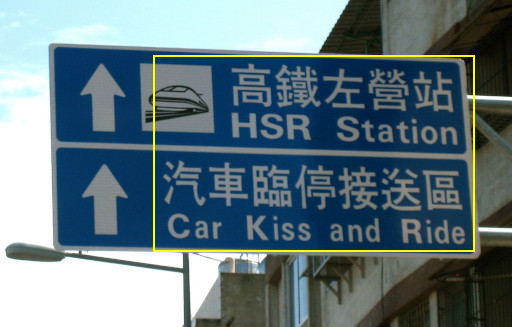

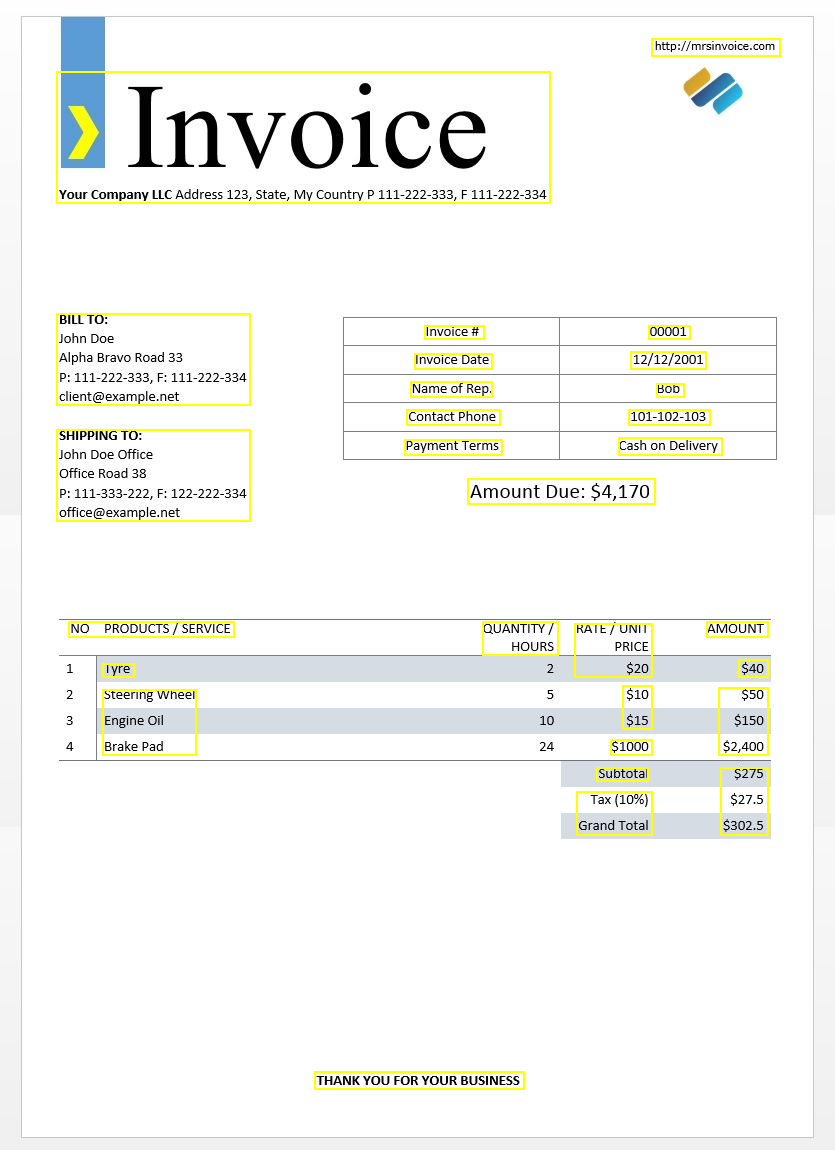

In [21]:
for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(image_folder, filename)
        im = PIL.Image.open(image_path)
        bounds = reader.readtext(image_path, paragraph=True)
        draw_boxes(im, bounds).save(f"output_{filename}") # to save image
        display(im) # to show images